# 2-1. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

## (1) 데이터 가져오기

In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print(diabetes.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## (2) 모델에 입력할 데이터 X 준비하기
## (3) 모델에 예측할 데이터 y 준비하기

In [2]:
df_X = diabetes['data']
df_y = diabetes['target']
print(type(df_X), df_X.shape)
print(type(df_y), df_y.shape)

<class 'numpy.ndarray'> (442, 10)
<class 'numpy.ndarray'> (442,)


## (4) train 데이터와 test 데이터로 분리하기

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## (5) 모델 준비하기

In [4]:
# 모델 함수
def model(X, W, b):
    predictions = 0
    for i in range(X.shape[1]):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## (6) 손실함수 loss 정의하기

In [5]:
# MSE 계산 함수
def MSE(predictions, y):
    return ((predictions - y) ** 2).mean()  # 두 값의 차이의 제곱의 평균    
# 손실함수: MSE
def loss(X, W, b, y):
    predictions = model(X, W, b)
    return MSE(predictions, y)

## (7)기울기를 구하는 gradient 함수 구현하기

In [6]:
import matplotlib.pyplot as plt

# 기울기 함수
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
        
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db


'''
학습 함수
    학습률 및 횟수를 지정하여 학습 진행 및 시각화
    학습 결과 파라메터 W, b 반환
''' 
def linear_regression_fit(X, y, W, b, l_rate = 0.0001, cnt = 1000):    
    losses = []
    for i in range(1, (cnt + 1)):
        dW, db = gradient(X, W, b, y)
        W -= l_rate * dW
        b -= l_rate * db
        L = loss(X, W, b, y)
        losses.append(L)
        if i % 10 == 0:
            print('Iteration %d : Loss %0.4f' % (i, L))
    plt.plot(losses)
    plt.show()
    return (W, b)

## (8) 하이퍼 파라미터인 학습률 설정하기
## (9) 모델 학습하기

Start(W, b): [0.62002182 0.5460171  0.36016253 0.15210841 0.37857406 0.14365349
 0.72515717 0.84610854 0.44113919 0.69446812] 0.5340929116521158
Iteration 10 : Loss 6256.2638
Iteration 20 : Loss 5912.7654
Iteration 30 : Loss 5836.0466
Iteration 40 : Loss 5764.6588
Iteration 50 : Loss 5695.5115
Iteration 60 : Loss 5628.4950
Iteration 70 : Loss 5563.5367
Iteration 80 : Loss 5500.5671
Iteration 90 : Loss 5439.5189
Iteration 100 : Loss 5380.3272
Iteration 110 : Loss 5322.9294
Iteration 120 : Loss 5267.2651
Iteration 130 : Loss 5213.2760
Iteration 140 : Loss 5160.9057
Iteration 150 : Loss 5110.1000
Iteration 160 : Loss 5060.8064
Iteration 170 : Loss 5012.9744
Iteration 180 : Loss 4966.5550


Iteration 190 : Loss 4921.5011
Iteration 200 : Loss 4877.7673
Iteration 210 : Loss 4835.3095
Iteration 220 : Loss 4794.0855
Iteration 230 : Loss 4754.0542
Iteration 240 : Loss 4715.1762
Iteration 250 : Loss 4677.4132
Iteration 260 : Loss 4640.7286
Iteration 270 : Loss 4605.0868
Iteration 280 : Loss 4570.4534
Iteration 290 : Loss 4536.7953
Iteration 300 : Loss 4504.0806
Iteration 310 : Loss 4472.2784
Iteration 320 : Loss 4441.3588
Iteration 330 : Loss 4411.2932
Iteration 340 : Loss 4382.0537
Iteration 350 : Loss 4353.6135
Iteration 360 : Loss 4325.9467
Iteration 370 : Loss 4299.0283
Iteration 380 : Loss 4272.8341
Iteration 390 : Loss 4247.3409
Iteration 400 : Loss 4222.5260
Iteration 410 : Loss 4198.3679
Iteration 420 : Loss 4174.8454
Iteration 430 : Loss 4151.9383
Iteration 440 : Loss 4129.6271
Iteration 450 : Loss 4107.8927
Iteration 460 : Loss 4086.7169
Iteration 470 : Loss 4066.0822
Iteration 480 : Loss 4045.9714
Iteration 490 : Loss 4026.3681
Iteration 500 : Loss 4007.2564
Iteratio

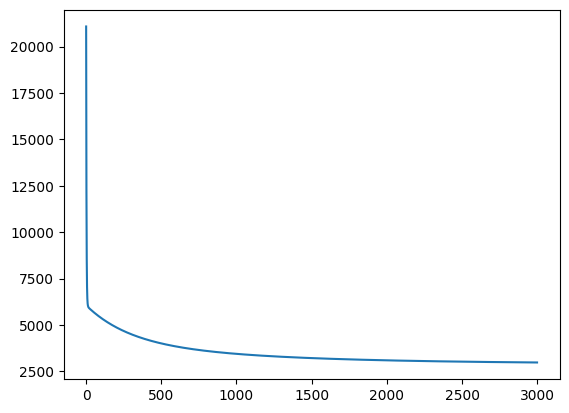

End(W, b): [  49.8574218  -151.30859244  446.82796351  295.94103524  -39.3686802
  -85.94078057 -204.5973504   147.53061579  336.89601148  138.88183586] 151.54732708854488


In [10]:
import numpy as np

# 초기 파라메터: W 백터, b 상수
W = np.random.rand(X_train.shape[1])
b = np.random.rand()
print('Start(W, b):', W, b)

# 학습률
LEARNING_RATE = 0.1

# 학습
(W, b) = linear_regression_fit(X_train, y_train, W, b, LEARNING_RATE, 3000)
print('End(W, b):', W, b)


## (10) test 데이터에 대한 성능 확인하기

In [11]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print('mse:', mse)

mse: 2870.478681135662


## (11) 정답 데이터와 예측한 데이터 시각화하기

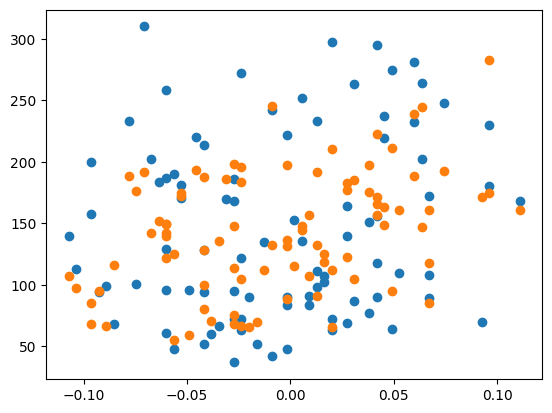

In [12]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()